In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
df1 = pd.read_csv(r"C:\Users\albin\Downloads\archive\twitter_training.csv")
df1

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df2 = pd.read_csv(r"C:\Users\albin\Downloads\archive\twitter_validation.csv")
df2

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [4]:
# creating headers as there are none
df1 = pd.read_csv(
    r"C:\Users\albin\Downloads\archive\twitter_training.csv",
    header=None,
    names=["id", "brand", "sentiment", "text"]
)

df2 = pd.read_csv(
    r"C:\Users\albin\Downloads\archive\twitter_validation.csv",
    header=None,
    names=["id", "brand", "sentiment", "text"]
)


In [5]:
df1

,id,brand,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df2

,id,brand,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


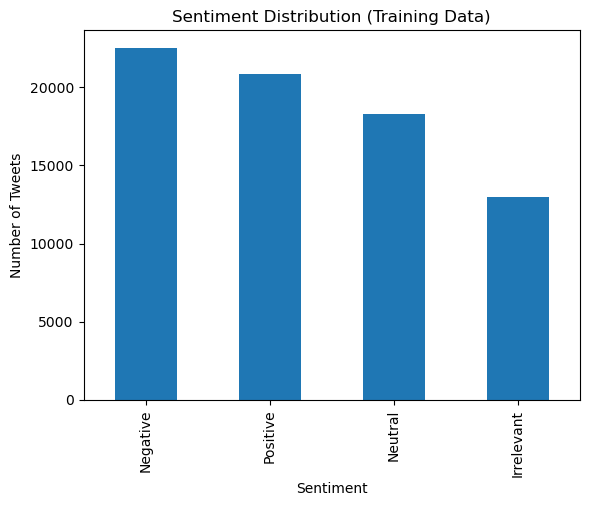

In [7]:

train_sentiment_counts = df1['sentiment'].value_counts()

train_sentiment_counts.plot(kind='bar')
plt.title("Sentiment Distribution (Training Data)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


In [8]:
brand_sentiment = df1.groupby(['brand', 'sentiment']).size().unstack().fillna(0)

brand_sentiment.head()


sentiment,Irrelevant,Negative,Neutral,Positive
brand,,,,
Amazon,192,576,1236,312
ApexLegends,192,600,942,642
AssassinsCreed,264,378,156,1446
Battlefield,918,474,360,594
Borderlands,240,426,600,1020


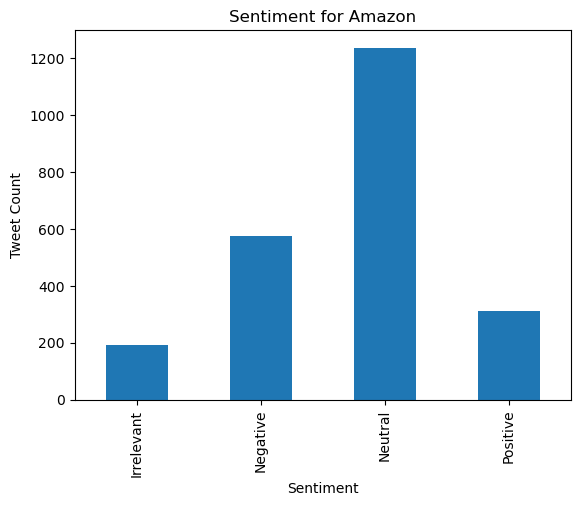

In [9]:
brand_sentiment.loc['Amazon'].plot(kind='bar')
plt.title("Sentiment for Amazon")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


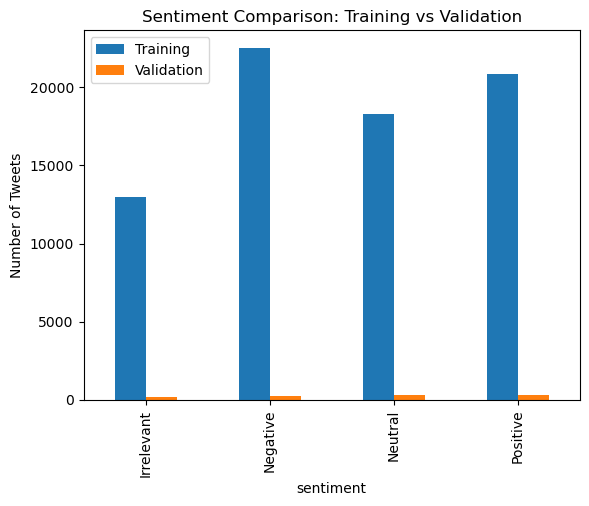

In [10]:
val_sentiment_counts = df2['sentiment'].value_counts()

comparison = pd.DataFrame({
    'Training': train_sentiment_counts,
    'Validation': val_sentiment_counts
})

comparison.plot(kind='bar')
plt.title("Sentiment Comparison: Training vs Validation")
plt.ylabel("Number of Tweets")
plt.show()


In [11]:

def get_common_words(texts, n=10):
    words = []
    for text in texts:
        words.extend(re.findall(r'\b[a-zA-Z]{3,}\b', str(text).lower()))
    return Counter(words).most_common(n)

get_common_words(df1[df1['sentiment']=="Negative"]['text'])


[('the', 14040),
 ('and', 8651),
 ('this', 4937),
 ('you', 4743),
 ('for', 4266),
 ('that', 4109),
 ('game', 3807),
 ('not', 2832),
 ('with', 2814),
 ('can', 2510)]

## Conclusion 
The sentiment analysis showed that negative opinions were the most common across both the training and validation datasets. When the sentiment distributions were visualized, similar patterns appeared in both datasets, suggesting that public opinion remains fairly consistent. A closer look at frequently used words in negative tweets revealed signs of dissatisfaction and frustration, pointing to potential issues or concerns customers have with certain brands or topics. Overall, this analysis highlights how sentiment analysis can help organizations better understand public attitudes and keep track of how their brand is perceived on social media.